In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# ***Heirarchical Clustering***

In [2]:
# Importing libraries for Heirarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/K-Means-Clustering/main/crime_data.csv")

In [4]:
data.rename(columns={'Unnamed: 0':'State'},inplace=True)

In [5]:
data

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Normalizing Function

def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [8]:
data=data.set_index('State')

In [9]:
data.sample(5)

,Murder,Assault,UrbanPop,Rape
State,,,,
Louisiana,15.4,249,66,22.2
Idaho,2.6,120,54,14.2
Pennsylvania,6.3,106,72,14.9
Alabama,13.2,236,58,21.2
Florida,15.4,335,80,31.9


In [10]:
norm_data=norm_func(data)

In [11]:
norm_data

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465
Colorado,0.427711,0.544521,0.779661,0.811370
Connecticut,0.150602,0.222603,0.762712,0.098191
Delaware,0.307229,0.660959,0.677966,0.219638
Florida,0.879518,0.993151,0.813559,0.635659


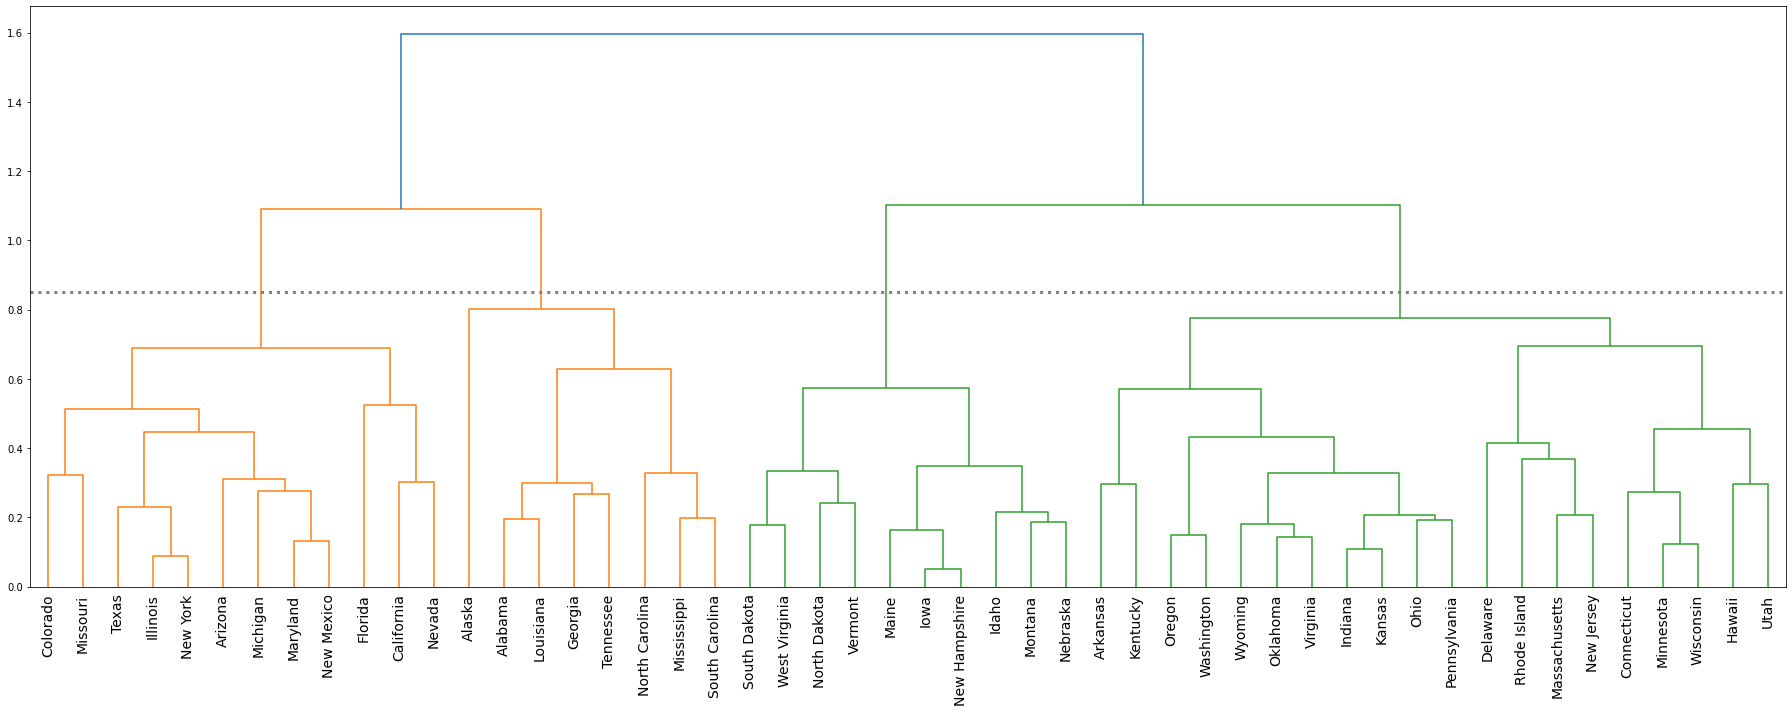

In [12]:
# Dendrogram
plt.figure(figsize=(25,10))
plt.axhline(y=0.85,c='gray',lw=3,linestyle=':')
dendrogram=sch.dendrogram(sch.linkage(norm_data,method='complete'),orientation='top',labels=data.index,leaf_font_size=14)
plt.tight_layout()

In [13]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [14]:
hc.fit(norm_data)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [15]:
y_hc=hc.fit_predict(norm_data)

In [16]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [17]:
data['H_Cluster_ID']=y_hc

In [18]:
data

,Murder,Assault,UrbanPop,Rape,H_Cluster_ID
State,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,3


In [19]:
data1=data.sort_values('H_Cluster_ID')
data1.iloc[:,[-1]]

,H_Cluster_ID
State,
Alabama,0
Louisiana,0
Mississippi,0
North Carolina,0
South Carolina,0
Georgia,0
Alaska,0
Tennessee,0
Utah,1


# ***K-Means Clustering***

In [20]:
# Importing Libraries for K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples

In [21]:
crime_df=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/K-Means-Clustering/main/crime_data.csv")

In [22]:
crime_df.rename(columns={'Unnamed: 0':'State'},inplace=True)

In [23]:
crime_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [24]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [25]:
crime_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [26]:
# We will scale our data

scaler=StandardScaler()
scaled_crime_df=scaler.fit_transform(crime_df.iloc[:,1:])

In [27]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [28]:
X=scaled_crime_df

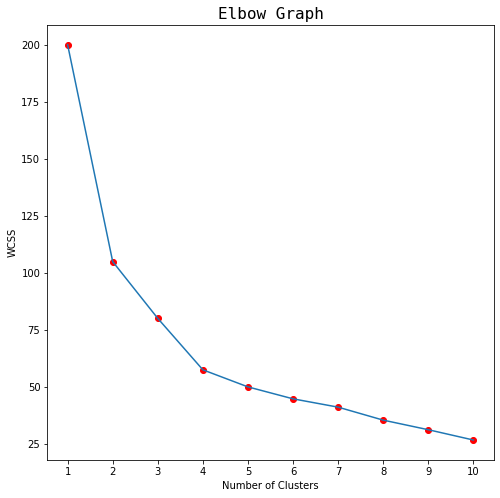

In [29]:
# Plotting the Elbow-Graph

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='r')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Graph',family='monospace',fontsize=16)
plt.show()

In [30]:
# Now fitting our model for 4 clusters

clustered=KMeans(n_clusters=4,init='k-means++',random_state=10)
clustered.fit(X)

KMeans(n_clusters=4, random_state=10)

In [31]:
clustered.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [32]:
clustered.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [33]:
crime_df["Cluster ID"]=clustered.labels_

In [34]:
crime_df.groupby(["Cluster ID"]).agg(['mean']).reset_index()

,Cluster ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,10.815385,257.384615,76.000000,33.192308
2,2,5.656250,138.875000,73.875000,18.781250
3,3,3.600000,78.538462,52.076923,12.176923


In [38]:
for i in np.array([0,1,2,3]):
  print('States that belong to Cluster Index',i)
  print(crime_df[crime_df['Cluster ID']==i])
  print('\n')

States that belong to Cluster Index 0
             State  Murder  Assault  UrbanPop  Rape  Cluster ID
0          Alabama    13.2      236        58  21.2           0
3         Arkansas     8.8      190        50  19.5           0
9          Georgia    17.4      211        60  25.8           0
17       Louisiana    15.4      249        66  22.2           0
23     Mississippi    16.1      259        44  17.1           0
32  North Carolina    13.0      337        45  16.1           0
39  South Carolina    14.4      279        48  22.5           0
41       Tennessee    13.2      188        59  26.9           0


States that belong to Cluster Index 1
         State  Murder  Assault  UrbanPop  Rape  Cluster ID
1       Alaska    10.0      263        48  44.5           1
2      Arizona     8.1      294        80  31.0           1
4   California     9.0      276        91  40.6           1
5     Colorado     7.9      204        78  38.7           1
8      Florida    15.4      335        80  31.

## ***DBSCAN***

In [39]:
# Importing libraries for DBSCAN

from sklearn.cluster import DBSCAN

In [41]:
crime_df=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/K-Means-Clustering/main/crime_data.csv")

In [42]:
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [43]:
crime_df.rename(columns={'Unnamed: 0':'State'},inplace=True)

In [44]:
crime_df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [45]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [46]:
crime_df0=crime_df.iloc[:,[0]]
crime_df1=crime_df.iloc[:,1:]

In [47]:
array=crime_df1.values

In [48]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [49]:
# Standardising the data

stdscaler=StandardScaler()
X=stdscaler.fit_transform(array)

In [50]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [51]:
# Using DBSCAN to detect outliers

dbscan=DBSCAN(eps=1,min_samples=3)

dbscan.fit_predict(X)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

In [55]:
clusters=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [56]:
clusters

,Cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [57]:
clustered_df=pd.concat([crime_df1,clusters],axis=1)

In [59]:
clustered_df

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [60]:
crime_df0

,State
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


In [63]:
clustered_df=pd.concat([clustered_df,crime_df0],axis=1)

In [64]:
clustered_df

,Murder,Assault,UrbanPop,Rape,Cluster,State
0,13.2,236,58,21.2,0,Alabama
1,10.0,263,48,44.5,-1,Alaska
2,8.1,294,80,31.0,-1,Arizona
3,8.8,190,50,19.5,-1,Arkansas
4,9.0,276,91,40.6,-1,California
5,7.9,204,78,38.7,-1,Colorado
6,3.3,110,77,11.1,1,Connecticut
7,5.9,238,72,15.8,-1,Delaware
8,15.4,335,80,31.9,-1,Florida
9,17.4,211,60,25.8,0,Georgia


In [66]:
# Noisy points of the data

clustered_df[clustered_df['Cluster']==-1]

,Murder,Assault,UrbanPop,Rape,Cluster,State
1,10.0,263,48,44.5,-1,Alaska
2,8.1,294,80,31.0,-1,Arizona
3,8.8,190,50,19.5,-1,Arkansas
4,9.0,276,91,40.6,-1,California
5,7.9,204,78,38.7,-1,Colorado
7,5.9,238,72,15.8,-1,Delaware
8,15.4,335,80,31.9,-1,Florida
10,5.3,46,83,20.2,-1,Hawaii
27,12.2,252,81,46.0,-1,Nevada
32,13.0,337,45,16.1,-1,North Carolina


In [67]:
noise_df=clustered_df[clustered_df['Cluster']==-1]

In [71]:
print('State that are in noise')
for state_name in list(noise_df.iloc[:,-1]):
  print(state_name)

State that are in noise
Alaska
Arizona
Arkansas
California
Colorado
Delaware
Florida
Hawaii
Nevada
North Carolina


In [72]:
clustered_df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
Cluster       0.660
dtype: float64